In [6]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
!apt-get -qq -y install fonts-nanum > /dev/null
# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# font = fm.FontProperties(fname=fontpath, size=9)

# fm._rebuild()



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [7]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

실시간 대여소 현황 지도

In [ ]:
import requests
import pandas as pd
import folium # 지도
from folium.plugins import MiniMap, MarkerCluster
# 시각화 모듈 임포트
import matplotlib.pyplot as plt
import seaborn as sns

station_info_apikey='557458657265686435354d786f6c4b' # 대여소 정보 api 키
startnum = 1 # 시작 페이지
endnum = 1000 # 끝 페이지

station_info_df = pd.DataFrame() # 대여소 정보 데이터 프레임

while True:
    # API 요청 URL 생성
    url = f'http://openapi.seoul.go.kr:8088/{station_info_apikey}/json/bikeList/{startnum}/{endnum}/'

    # API 요청
    response = requests.get(url)
    json1 = response.json()

    # 'CODE' 값을 확인하여 종료 여부 결정
    code = json1.get('CODE', None)
    if code == 'INFO-200':
        print("데이터가 없습니다. 종료합니다.")
        print('\n\n\n')
        break

    # 데이터가 있는 경우 DataFrame에 추가
    if 'rentBikeStatus' in json1:
        print(f'{startnum} ~ {endnum} 데이터 추가 중..')
        data = json1['rentBikeStatus']['row']
        station_info_df = station_info_df.append(data, ignore_index=True)

    # 다음 페이지를 위해 startnum 업데이트
    startnum += 1000
    endnum += 1000

# 데이터프레임 정보
# print(station_info_df.info())
# print('\n\n\n')

# 서울역 중심 지도
m = folium.Map(location = ['37.5536067','126.9674308'], zoom_start = 13)

# 클러스터 생성
marker_cluster = MarkerCluster().add_to(m)

for i in range(len(station_info_df)):
    lat = station_info_df.loc[i, 'stationLatitude'] # 위도
    long = station_info_df.loc[i, 'stationLongitude'] # 경도
    name = station_info_df.loc[i, 'stationName']  # 대여소 주소
    available = station_info_df.loc[i, 'parkingBikeTotCnt'] # 대여 가능한 자전거 주차 건수
    total = station_info_df.loc[i,'rackTotCnt'] # 대여소 자전거 총 개수

    if int(available) / int(total) > 0.5: # 대여 가능 자전거 수 50% 이상
        color = 'blue'
    elif int(available) < 2: # 2대 미만
        color = 'red'
    else:
        color = 'green' # 그외

    icon = folium.Icon(color = color, icon = 'info-sign')

    # 각 대여소 위치에 맞게 지도에 마크 추가
    folium.Marker(location = [lat, long],
                 tooltip = f"{name} / 남은 자전거 : {available}대",
                  icon = icon
             ).add_to(marker_cluster)

print('서울시 공공자전거 대여소 지도')
m # 지도 출력
m.save('bikeList.html') # 지도 저장
print('\n\n\n')

1 ~ 1000 데이터 추가 중..


<ipython-input-1-b3706014786e>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  station_info_df = station_info_df.append(data, ignore_index=True)


1001 ~ 2000 데이터 추가 중..


<ipython-input-1-b3706014786e>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  station_info_df = station_info_df.append(data, ignore_index=True)


2001 ~ 3000 데이터 추가 중..


<ipython-input-1-b3706014786e>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  station_info_df = station_info_df.append(data, ignore_index=True)


데이터가 없습니다. 종료합니다.




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rackTotCnt         2709 non-null   object
 1   stationName        2709 non-null   object
 2   parkingBikeTotCnt  2709 non-null   object
 3   shared             2709 non-null   object
 4   stationLatitude    2709 non-null   object
 5   stationLongitude   2709 non-null   object
 6   stationId          2709 non-null   object
dtypes: object(7)
memory usage: 148.3+ KB
None




서울시 공공자전거 대여소 지도






대여소 정보

1 ~ 1000 데이터 추가 중..


<ipython-input-10-a862333b0d9c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  station_info_df = station_info_df.append(data, ignore_index=True)


1001 ~ 2000 데이터 추가 중..


<ipython-input-10-a862333b0d9c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  station_info_df = station_info_df.append(data, ignore_index=True)


2001 ~ 3000 데이터 추가 중..


<ipython-input-10-a862333b0d9c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  station_info_df = station_info_df.append(data, ignore_index=True)


3001 ~ 4000 데이터 추가 중..


<ipython-input-10-a862333b0d9c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  station_info_df = station_info_df.append(data, ignore_index=True)


데이터가 없습니다. 종료합니다.






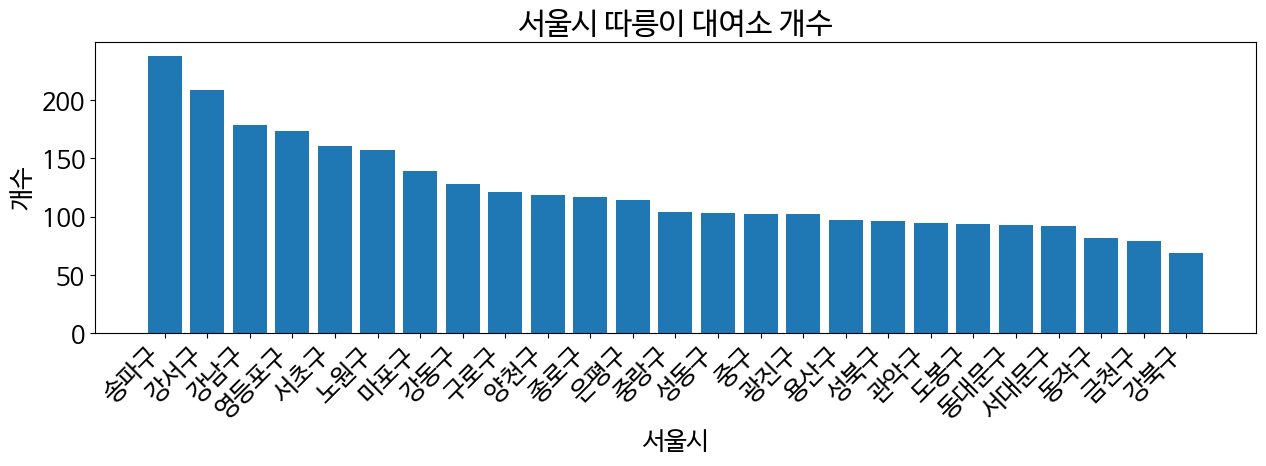

In [10]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

station_info_apikey='7746556f776568643735647a41546b' # 대여소 정보 api 키
startnum = 1 # 시작 페이지
endnum = 1000 # 끝 페이지

station_info_df = pd.DataFrame() # 대여소 정보 데이터 프레임

while True:
    # API 요청 URL 생성
    url = f'http://openapi.seoul.go.kr:8088/{station_info_apikey}/json/tbCycleStationInfo/{startnum}/{endnum}/'

    # API 요청
    response = requests.get(url)
    json1 = response.json()

    # 'CODE' 값을 확인하여 종료 여부 결정
    code = json1.get('CODE', None)
    if code == 'INFO-200':
        print("데이터가 없습니다. 종료합니다.")
        print('\n\n\n')
        break

    # 데이터가 있는 경우 DataFrame에 추가
    if 'stationInfo' in json1:
        print(f'{startnum} ~ {endnum} 데이터 추가 중..')
        data = json1['stationInfo']['row']
        station_info_df = station_info_df.append(data, ignore_index=True)

    # 다음 페이지를 위해 startnum 업데이트
    startnum += 1000
    endnum += 1000

# 데이터프레임 정보
# print(station_info_df.info())
# print('\n\n\n')


# 지역 이름으로 그룹화
group = station_info_df.groupby('STA_LOC').count().reset_index()
group.sort_values(by=['RENT_ID'], ascending=False,inplace=True)

# 그래프 그리기
plt.figure(figsize=(13, 5))
plt.bar(group['STA_LOC'], group['RENT_ID'])
plt.xlabel('서울시')
plt.ylabel('개수')
plt.title('서울시 따릉이 대여소 개수')
plt.xticks(rotation=45, ha="right")  # X 축 레이블 회전 및 정렬
plt.tight_layout()  # 레이아웃 조정
plt.show()

일일 따릉이 이용 현황

검색할 날짜 입력 ex)20001130  20230207
1 ~ 1000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


1001 ~ 2000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


2001 ~ 3000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


3001 ~ 4000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


4001 ~ 5000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


5001 ~ 6000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


6001 ~ 7000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


7001 ~ 8000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


8001 ~ 9000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


9001 ~ 10000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


10001 ~ 11000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


11001 ~ 12000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


12001 ~ 13000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


13001 ~ 14000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


14001 ~ 15000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


15001 ~ 16000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


16001 ~ 17000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


17001 ~ 18000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


18001 ~ 19000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


19001 ~ 20000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


20001 ~ 21000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


21001 ~ 22000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


22001 ~ 23000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


23001 ~ 24000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


24001 ~ 25000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


25001 ~ 26000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


26001 ~ 27000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


27001 ~ 28000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


28001 ~ 29000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


29001 ~ 30000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


30001 ~ 31000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


31001 ~ 32000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


32001 ~ 33000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


33001 ~ 34000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


34001 ~ 35000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


35001 ~ 36000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


36001 ~ 37000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


37001 ~ 38000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


38001 ~ 39000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


39001 ~ 40000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


40001 ~ 41000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


41001 ~ 42000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


42001 ~ 43000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


43001 ~ 44000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


44001 ~ 45000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


45001 ~ 46000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


46001 ~ 47000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


47001 ~ 48000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


48001 ~ 49000 데이터 추가 중..


<ipython-input-9-26f0d66fee62>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rent_info_df = rent_info_df.append(data, ignore_index=True)


데이터가 없습니다. 종료합니다.




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48710 entries, 0 to 48709
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   RENT_DT      48710 non-null  object
 1   RENT_ID      48710 non-null  object
 2   RENT_NM      48710 non-null  object
 3   RENT_TYPE    48710 non-null  object
 4   GENDER_CD    48710 non-null  object
 5   AGE_TYPE     48710 non-null  object
 6   USE_CNT      48710 non-null  int64 
 7   EXER_AMT     48572 non-null  object
 8   CARBON_AMT   48572 non-null  object
 9   MOVE_METER   48710 non-null  object
 10  MOVE_TIME    48710 non-null  object
 11  START_INDEX  48710 non-null  int64 
 12  END_INDEX    48710 non-null  int64 
 13  RNUM         48710 non-null  object
dtypes: int64(3), object(11)
memory usage: 5.2+ MB
None
      RENT_DT RENT_ID                    RENT_NM RENT_TYPE GENDER_CD AGE_TYPE  \
0  2023-02-07   00731          731. 서울시 도로환경관리센터       정기권               ~10

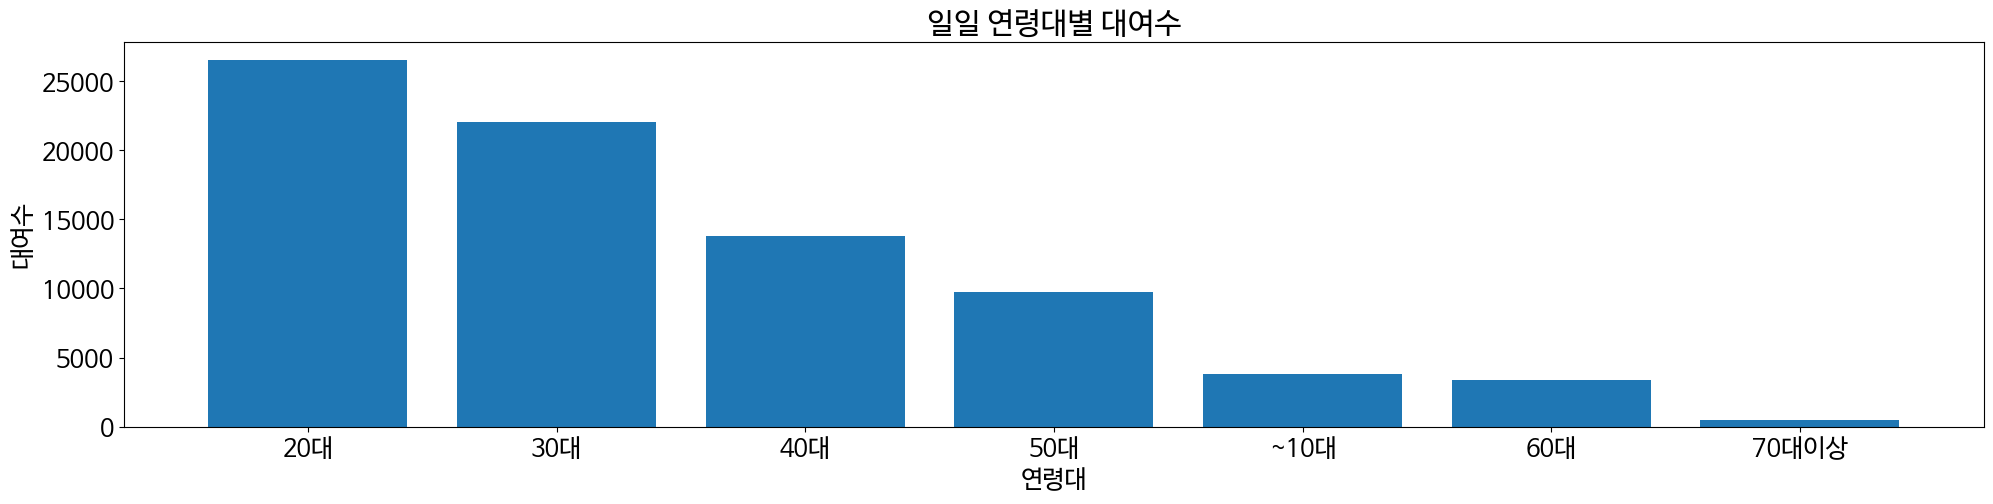

<ipython-input-9-26f0d66fee62>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_df['GENDER_CD'] = gender_df['GENDER_CD'].str.upper()


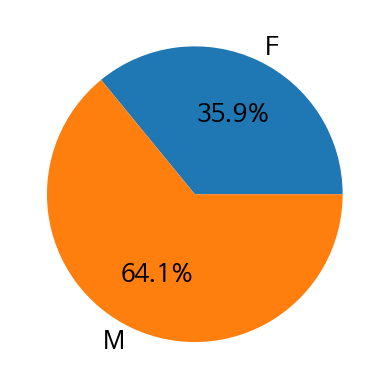

  GENDER_CD  USE_CNT
0         F    21002
1         M    37458






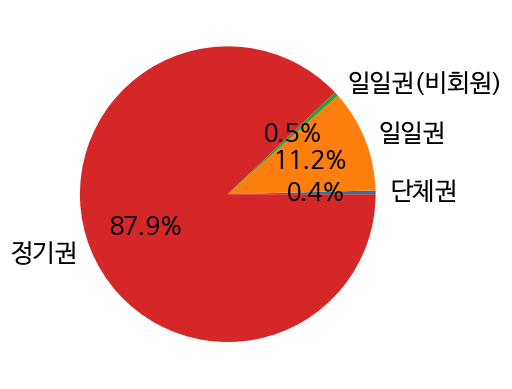

  RENT_TYPE  USE_CNT
0       단체권      352
1       일일권     9710
2  일일권(비회원)      404
3       정기권    76062




                RENT_NM  USE_CNT
1208        마곡나루역 2번 출구      400
1195      마곡나루역 5번출구 뒤편      286
187   롯데월드타워(잠실역2번출구 쪽)      234
1220        마곡나루역 3번 출구      230
132   발산역 1번, 9번 인근 대여소      229
955         영등포구청역 1번출구      213
2265      뚝섬유원지역 1번출구 앞      201
684          구로디지털단지역 앞      198
679        신도림역 1번 출구 앞      190
1141               송파구청      188






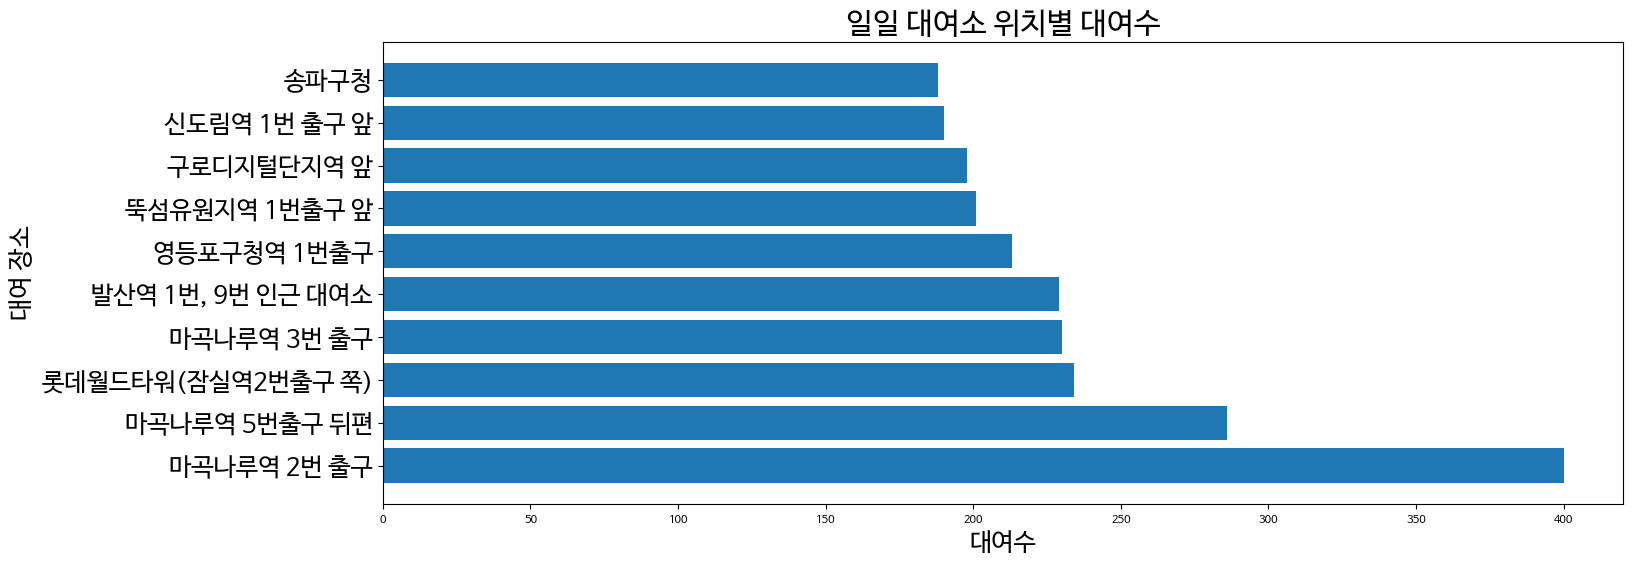





          RENT_DT RENT_ID                       RENT_NM RENT_TYPE GENDER_CD  \
0      2023-02-07   00731             731. 서울시 도로환경관리센터       정기권             
1      2023-02-07   00733              733. 신정이펜하우스314동       정기권             
2      2023-02-07   00735                   735. 영도초등학교       정기권             
3      2023-02-07   00735                   735. 영도초등학교       정기권             
4      2023-02-07   00737                     737. 장수공원       정기권             
...           ...     ...                           ...       ...       ...   
48705  2023-02-07   00426                 426. 서울신용보증재단       정기권         M   
48706  2023-02-07   00722  722. 경서농협 버스정류장(우리은행신정동지점방향)       정기권         M   
48707  2023-02-07   00723                   723. SBS방송국       정기권         M   
48708  2023-02-07   00724          724. 계남공원 입구 주출입구 좌측       정기권         M   
48709  2023-02-07   00725               725. 양강중학교앞 교차로       정기권         M   

      AGE_TYPE  USE_CNT EXER_AMT CARBON_AMT  MO

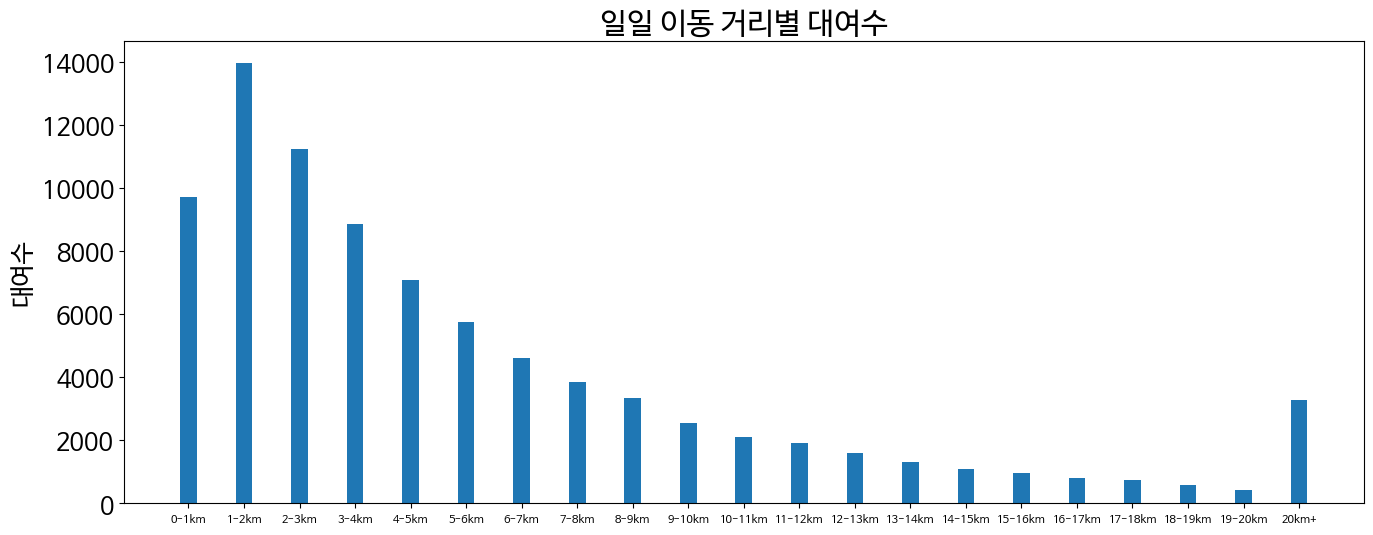

In [9]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

day = input('검색할 날짜 입력 ex)20001130  ')

rent_info_apikey = '4b4561794d656864393862434b4743' # 일일 따릉이 이용 정보 api 키

rent_info_df = pd.DataFrame() # 일일 따릉이 이용 정보 데이터 프레임
startnum = 1 # 시작 페이지
endnum = 1000 # 끝 페이지

while True:
    # API 요청 URL 생성
    url = f'http://openapi.seoul.go.kr:8088/{rent_info_apikey}/json/tbCycleRentUseDayInfo/{startnum}/{endnum}/{day}'

    # API 요청
    response = requests.get(url)
    json1 = response.json()

    # 'CODE' 값을 확인하여 종료 여부 결정
    code = json1.get('CODE', None)
    if code == 'INFO-200':
        print("데이터가 없습니다. 종료합니다.")
        print('\n\n\n')
        break

    # 데이터가 있는 경우 DataFrame에 추가
    if 'cycleRentUseDayInfo' in json1:
        print(f'{startnum} ~ {endnum} 데이터 추가 중..')
        data = json1['cycleRentUseDayInfo']['row']
        rent_info_df = rent_info_df.append(data, ignore_index=True)

    if code == 'INFO-200':
        print("데이터가 없습니다. 종료합니다.")
        print('\n\n\n')
        break

    # 다음 페이지를 위해 startnum 업데이트
    startnum += 1000
    endnum += 1000

    # if endnum == 10000:
    #   print("데이터가 너무 많습니다... 종료합니다.")
    #   print('\n\n\n')
    #   break

rent_info_df['USE_CNT'] = rent_info_df['USE_CNT'].astype(int)

# print(rent_info_df.info())
# print(rent_info_df.head(10))
# print('\n\n\n')

# AGE_TYPE 별로 그룹화
grouped_age = rent_info_df.groupby('AGE_TYPE')['USE_CNT'].sum().reset_index()

#기타 데이터 삭제
grouped_age = grouped_age[grouped_age['AGE_TYPE'] != '기타']

grouped_age.sort_values(by=['USE_CNT'], ascending=False,inplace=True)

# 연령대별 대여수 그래프 그리기
plt.figure(figsize=(24, 5))
plt.bar(grouped_age['AGE_TYPE'], grouped_age['USE_CNT'])
plt.xlabel('연령대')
plt.ylabel('대여수')
plt.title('일일 연령대별 대여수')
plt.show()
print('\n\n\n')

# 성별에 따른 이용 건수
# GENDER_CD가 공백인 행 제거
gender_df = rent_info_df[rent_info_df['GENDER_CD'].str.strip() != '']

# 대소문자 구분 없이 'F'와 'f'를 합치고 'M'와 'm'을 합침
gender_df['GENDER_CD'] = gender_df['GENDER_CD'].str.upper()

grouped_gender = gender_df.groupby('GENDER_CD')['USE_CNT'].sum().reset_index()
plt.pie(grouped_gender['USE_CNT'], labels=grouped_gender['GENDER_CD'], autopct='%.1f%%')
plt.show()
# print(grouped_gender)
print('\n\n\n')

# 렌트 타입별 이용 건수
grouped_rent_type = rent_info_df.groupby("RENT_TYPE")['USE_CNT'].sum().reset_index()
plt.pie(grouped_rent_type['USE_CNT'], labels=grouped_rent_type['RENT_TYPE'], autopct='%.1f%%')
plt.show()
# print(grouped_rent_type)
print('\n\n\n')

# 일일 대여소 위치별 대여수 그룹화
grouped_rent_name = rent_info_df.groupby('RENT_NM')['USE_CNT'].sum().reset_index()
grouped_rent_name['RENT_NM'] = grouped_rent_name['RENT_NM'].str.split('.').str[1].str.strip()
grouped_rent_name.sort_values(by=['USE_CNT'], ascending=False,inplace=True)
# print(grouped_rent_name.head(10))
print('\n\n\n')

# 일일 대여소 위치별 대여수 그래프 그리기
plt.figure(figsize=(16, 6))
plt.barh(grouped_rent_name.head(10)['RENT_NM'], grouped_rent_name.head(10)['USE_CNT'])
plt.ylabel('대여 장소')
plt.xlabel('대여수')
plt.title('일일 대여소 위치별 대여수')
plt.tick_params(axis='x', labelsize=8) # x 축 레이블 폰트 크기 조절
plt.show()
print('\n\n\n')


# 일일 이동 거리수로 그룹화
# MOVE_METER를 미터에서 킬로미터로 변환
rent_info_df['MOVE_METER'] = rent_info_df['MOVE_METER'].astype(float)
rent_info_df['MOVE_METER'] = rent_info_df['MOVE_METER'] / 1000  # 미터를 킬로미터로 변환

bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, float('inf')]
labels = ['0-1km', '1-2km', '2-3km', '3-4km', '4-5km', '5-6km', '6-7km', '7-8km', '8-9km', '9-10km',
          '10-11km', '11-12km', '12-13km', '13-14km', '14-15km', '15-16km', '16-17km', '17-18km', '18-19km', '19-20km', '20km+']

# 1km 단위로 그룹화
rent_info_df['MOVE_METER_GROUP'] = pd.cut(rent_info_df['MOVE_METER'], bins=bins, labels=labels)

# print(rent_info_df)

grouped_move_meter = rent_info_df.groupby('MOVE_METER_GROUP')['USE_CNT'].sum().reset_index()
# print(grouped_move_meter.head(20))
print('\n\n\n')

# 그래프 그리기
plt.figure(figsize=(16, 6))
plt.bar(grouped_move_meter['MOVE_METER_GROUP'], grouped_move_meter['USE_CNT'],width=0.3)
plt.ylabel('대여수')
plt.title('일일 이동 거리별 대여수')
plt.tick_params(axis='x', labelsize=8) # x 축 레이블 폰트 크기 조절
plt.show()
print('\n\n\n')